<a href="https://colab.research.google.com/github/djohdjo/dataframe_airbnb/blob/master/projet_final_AIRBNB_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Un couple de toursite souhaite trouver un logement à Paris pendant deux jours pour célébrer ses noces d'argent (25 années de mariage).*

**Quel type de logement veut-il louer ?**

- Logement entier
- 2 voyageurs
- 1 chambre
- 1 lits
- 1 salle de bain


**Quels sont ses critères ?**

- Un logement situé dans les beaux quartiers de Paris
- Un logement spacieux 50 m² min
- Un logement pour deux personnes
- Un logement disponible pour la date d'anniversaire de leur mariage
- Dans un budget de 1000 euros pour les deux jours
- Dans quel quartier le couple veut-il se loger ?

Paris hyper centre (en prenant en compte budget et surface)
A quelle date est prévue l'hébergement ? Arrivée le 15 mars

# **https://github.com/djohdjo/dataframe_airbnb/blob/master/projet_final_AIRBNB_Paris.ipynb**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls "/content/drive/My Drive/data"

calendar.csv     listings.csv     neighbourhoods.geojson  reviews.csv
calendar.csv.gz  listings.csv.gz  paris/                  reviews.csv.gz


# ***Installation des librairies***

In [3]:
pip install geopandas

     |████████████████████████████████| 901kB 4.8MB/s 
     |████████████████████████████████| 17.9MB 36.2MB/s 
     |████████████████████████████████| 9.8MB 21.8MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=79771490a09abf276e7a0c1fe6377e41eef87a20f1b2f61cdca44b0e25150aba
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [4]:
pip install folium

In [5]:
pip install smopy

In [6]:
pip install plotly

# ***Importation des librairies***

In [7]:
#les imports

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import smopy
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

# #to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode

import cufflinks
# cufflinks.go_offline()
cufflinks.set_config_file(offline=False, world_readable=True)
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

#text mining
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


#color text

from termcolor import colored

import random

# ***NETTOYAGE FICHIER / LISTINGS - vérification des données***

**Importation des fichiers csv en une fois pour lister le travail à faire
- avec un retrait de l'index dan le fichier listing afin d'éviter un problème de id ** 

In [0]:
#importation fichier csv et lecture
listings = pd.read_csv(r"/content/drive/My Drive/data/listings.csv", index_col=None)

listings_details = pd.read_csv(r"/content/drive/My Drive/data/listings.csv.gz", index_col= "id", low_memory=False)

# parsage de la date sur fichiers : calendar, reviews et reviews_details

calendar = pd.read_csv(r"/content/drive/My Drive/data/calendar.csv.gz", parse_dates=['date']) # index_col=['listing_id']

#à faire un merge pour les 2 fichiers reviews et reviews_detail

reviews = pd.read_csv(r"/content/drive/My Drive/data/reviews.csv", parse_dates=['date'])# index_col=['listing_id']
reviews_details = pd.read_csv(r"/content/drive/My Drive/data/reviews.csv.gz", parse_dates=['date'])

Analyse des données des fichier (listings et listings_details) :  listings.csv et listings.csv.gz

# Avec un merge pour ne récupérer que les colonnes utiles des 2 fichiers de listings et listings_details 

In [11]:
#le merge des fichiers listings et listings_details pour ne récupérer que les colonnes utiles dans les 2 fihiers

target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]

listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')

#liste info
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 0 to 64292
Data columns (total 76 columns):
id                                64293 non-null int64
name                              64224 non-null object
host_id                           64293 non-null int64
host_name                         64229 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     64293 non-null object
latitude                          64293 non-null float64
longitude                         64293 non-null float64
room_type                         64293 non-null object
price                             64293 non-null int64
minimum_nights                    64293 non-null int64
number_of_reviews                 64293 non-null int64
last_review                       49684 non-null object
reviews_per_month                 49684 non-null float64
calculated_host_listings_count    64293 non-null int64
availability_365                  64293 non-null int64
pr

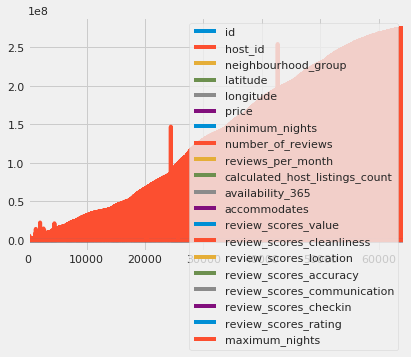

In [0]:
listings.plot()

In [0]:
#entête et pied (par 5)

listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,3,8,2018-12-19,0.26,1,227,Apartment,2,2016-12-27,10.0,10.0,10.0,10.0,10.0,10.0,100.0,15,https://www.airbnb.com/rooms/3109,f,NaN,within a day,100%,"Paris, Île-de-France, France",$490.00,NaN,Paris
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,180,2019-06-21,1.47,1,27,Apartment,2,2009-06-30,9.0,8.0,10.0,9.0,9.0,9.0,91.0,90,https://www.airbnb.com/rooms/5396,f,We are both journalists based in the Middle Ea...,within an hour,100%,"Paris, Ile-de-France, France",$600.00,"$2,000.00",Paris
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,115,10,248,2019-06-25,2.47,1,240,Apartment,4,2011-04-08,10.0,9.0,10.0,10.0,10.0,10.0,94.0,23,https://www.airbnb.com/rooms/7397,f,"I am a writer,51, author of novels, books of l...",within an hour,100%,"Paris, Île-de-France, France",NaN,"$2,200.00",Paris
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87464,2.34341,Entire home/apt,130,6,6,2015-09-14,0.05,1,302,Apartment,2,2010-05-10,10.0,10.0,10.0,10.0,10.0,10.0,96.0,365,https://www.airbnb.com/rooms/7964,f,Hello ! \r\nOur apartment is great and I am su...,NaN,NaN,"Paris, Île-de-France, France",NaN,NaN,Paris
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,NaN,Ménilmontant,48.86528,2.39326,Entire home/apt,90,3,1,2010-06-16,0.01,1,186,Apartment,3,2010-06-16,NaN,NaN,NaN,NaN,NaN,NaN,100.0,365,https://www.airbnb.com/rooms/8522,f,"De Paris, propre et organisé.",NaN,NaN,"Paris, Ile-de-France, France",$600.00,NaN,Paris


In [0]:
#affiche le nb de colonnes et de lignes

print(listings.shape) 

(64293, 36)


In [0]:
#vérification des types de fichiers

listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
property_type                      object
accommodates                        int64
first_review                       object
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            float64
review_scores_communication       

In [0]:
listings.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'property_type', 'accommodates', 'first_review',
       'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'street', 'weekly_price', 'monthly_price',
       'market'],
      dtype='object')

In [0]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights
count,6.429300e+04,6.429300e+04,0.0,64293.000000,64293.000000,64293.000000,64293.000000,64293.000000,49684.000000,64293.000000,64293.000000,64293.000000,48463.000000,48497.000000,48464.000000,48483.000000,48491.000000,48462.000000,48536.000000,6.429300e+04
mean,1.934634e+07,6.648611e+07,NaN,48.864109,2.345350,116.763925,5.529342,18.749195,1.210193,7.814210,83.641314,3.054516,9.269236,9.208590,9.653372,9.595178,9.717948,9.680451,92.971938,8.686509e+02
std,1.116680e+07,7.693518e+07,NaN,0.018483,0.033776,164.316690,47.874056,38.751261,1.459079,35.337494,118.039870,1.549560,0.897254,1.065818,0.685451,0.787593,0.701960,0.734938,8.307887,3.954785e+04
min,3.109000e+03,2.419000e+03,NaN,48.812890,2.219430,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,1.000000e+00
25%,9.186615e+06,1.080773e+07,NaN,48.850670,2.323950,60.000000,2.000000,1.000000,0.230000,1.000000,0.000000,2.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,90.000000,3.000000e+01
50%,1.968928e+07,3.266216e+07,NaN,48.865260,2.348330,80.000000,2.000000,5.000000,0.700000,1.000000,15.000000,2.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,95.000000,1.125000e+03
75%,2.950201e+07,9.359166e+07,NaN,48.879230,2.370900,120.000000,4.000000,19.000000,1.640000,1.000000,155.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000,1.125000e+03
max,3.656124e+07,2.748233e+08,NaN,48.905210,2.471890,9379.000000,9999.000000,809.000000,31.150000,323.000000,365.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1.000000e+07


#Nettoyage des valeurs aberrantes

Clean Data

Trop de col, stratégie : affichage par bloc de 5 cols

In [0]:
#affichage de 5 colonnes 

listings[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group']]
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,3,8,2018-12-19,0.26,1,227,Apartment,2,2016-12-27,10.0,10.0,10.0,10.0,10.0,10.0,100.0,15,https://www.airbnb.com/rooms/3109,f,NaN,within a day,100%,"Paris, Île-de-France, France",$490.00,NaN,Paris
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,180,2019-06-21,1.47,1,27,Apartment,2,2009-06-30,9.0,8.0,10.0,9.0,9.0,9.0,91.0,90,https://www.airbnb.com/rooms/5396,f,We are both journalists based in the Middle Ea...,within an hour,100%,"Paris, Ile-de-France, France",$600.00,"$2,000.00",Paris
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,115,10,248,2019-06-25,2.47,1,240,Apartment,4,2011-04-08,10.0,9.0,10.0,10.0,10.0,10.0,94.0,23,https://www.airbnb.com/rooms/7397,f,"I am a writer,51, author of novels, books of l...",within an hour,100%,"Paris, Île-de-France, France",NaN,"$2,200.00",Paris
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87464,2.34341,Entire home/apt,130,6,6,2015-09-14,0.05,1,302,Apartment,2,2010-05-10,10.0,10.0,10.0,10.0,10.0,10.0,96.0,365,https://www.airbnb.com/rooms/7964,f,Hello ! \r\nOur apartment is great and I am su...,NaN,NaN,"Paris, Île-de-France, France",NaN,NaN,Paris
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,NaN,Ménilmontant,48.86528,2.39326,Entire home/apt,90,3,1,2010-06-16,0.01,1,186,Apartment,3,2010-06-16,NaN,NaN,NaN,NaN,NaN,NaN,100.0,365,https://www.airbnb.com/rooms/8522,f,"De Paris, propre et organisé.",NaN,NaN,"Paris, Ile-de-France, France",$600.00,NaN,Paris


In [0]:
#vérification des colonnes vides
# combien de données manquantes sur chaque colonne
# quels sont les données manquantes sur telles ou telles colonnes

#Trouver les na ds le df ?
listings.isnull().sum()[listings.isnull().sum() > 0]
# code trop long, c mieux ainsi :
listings_cols_na = listings.isnull().sum()
listings_cols_na = listings_cols_na[listings_cols_na > 0]
listings_cols_na

name                              69
host_name                         64
neighbourhood_group            64293
last_review                    14609
reviews_per_month              14609
first_review                   14609
review_scores_value            15830
review_scores_cleanliness      15796
review_scores_location         15829
review_scores_accuracy         15810
review_scores_communication    15802
review_scores_checkin          15831
review_scores_rating           15757
host_is_superhost                 64
host_about                     31607
host_response_time             25028
host_response_rate             25028
weekly_price                   53899
monthly_price                  57694
market                           116
dtype: int64

In [0]:
#fonction qui permet de vérifier les colonnes qui ont des NaN, plus test de couleur

def check_na(df):
	nb_lignes = df.shape[0]
	df_cols_na = df.isnull().sum()
	df_cols_na = df_cols_na[df_cols_na > 0]

	if not df_cols_na.empty :
		df_na_sum = df_cols_na.sum()
		df_na_percent = df_na_sum / nb_lignes
		print('\n\n\n', colored(
			"*** Attention : Le df est touchée par {} de données manquantes ce qui correspond à {} % ***" \
			.format(df_na_sum, df_na_percent), 'red'), '\n\n\n')

		# Je construit le df_check.na
		percent_na = [(str(round((v/df.shape[0]) * 100,  2)) + ' %') for v in df_cols_na.values]
		df_cols_na = pd.DataFrame({
			"col" : df_cols_na.index,
			"count_na" : df_cols_na.values,
			"%_na" : percent_na
			})
		print('\n\n\n', colored(df_cols_na, 'green'), '\n\n\n')
		return df_cols_na
	else:
		print(colored("Djohra: Super il n'y a pas de données manquantes", 'bleu'))



check_na(listings)   




 *** Attention : Le df est touchée par 412344 de données manquantes ce qui correspond à 6.413513135178013 % *** 






                             col  count_na     %_na
0                          name        69   0.11 %
1                     host_name        64    0.1 %
2           neighbourhood_group     64293  100.0 %
3                   last_review     14609  22.72 %
4             reviews_per_month     14609  22.72 %
5                  first_review     14609  22.72 %
6           review_scores_value     15830  24.62 %
7     review_scores_cleanliness     15796  24.57 %
8        review_scores_location     15829  24.62 %
9        review_scores_accuracy     15810  24.59 %
10  review_scores_communication     15802  24.58 %
11        review_scores_checkin     15831  24.62 %
12         review_scores_rating     15757  24.51 %
13            host_is_superhost        64    0.1 %
14                   host_about     31607  49.16 %
15           host_response_time     25028  38.93 %
16        

,col,count_na,%_na
0,name,69,0.11 %
1,host_name,64,0.1 %
2,neighbourhood_group,64293,100.0 %
3,last_review,14609,22.72 %
4,reviews_per_month,14609,22.72 %
5,first_review,14609,22.72 %
6,review_scores_value,15830,24.62 %
7,review_scores_cleanliness,15796,24.57 %
8,review_scores_location,15829,24.62 %
9,review_scores_accuracy,15810,24.59 %


In [45]:
#selection des colonnes qui ont 100% de NAN ou voir audesus de 80% et qui seront supprimées

# random.random()

def check_na(df):
	nb_lignes = df.shape[0]
	df_cols_na = df.isnull().sum()
	df_cols_na = df_cols_na[df_cols_na > 0]

	if not df_cols_na.empty :
		df_na_sum = df_cols_na.sum()
		df_na_percent = df_na_sum / nb_lignes
		print('\n\n\n',
			"*** Attention : Le df est touchée par {} de données manquantes ce qui correspond à {} % ***" \
			.format(df_na_sum, round(df_na_percent)), '\n\n\n')

		# Je construit le df_check.na      
		percent_na = [round((v/df.shape[0]) * 100,  2) for v in df_cols_na.values]
		df_cols_na = pd.DataFrame({
			"col" : df_cols_na.index,
			"count_na" : df_cols_na.values,
			"%_na" : percent_na
			})
		print('\n\n\n', df_cols_na, '\n\n\n')

		if (percent_na >= 80) and (percent_na == 100):
		    print("à supprimmer", colored(df_cols_na, 'red')) # Output Failed as Red Text
		elif percent_na < 50:
		    print("valeurs passable", colored(df_cols_na, 'green')) # Red Color
		else:
		    print("à garder", colored(df_cols_na, 'bleu')) # Blue Color
		return df_cols_na
	else:
		print("Super il n'y a pas de données manquantes")


check_na(listings)




 *** Attention : Le df est touchée par 1049744 de données manquantes ce qui correspond à 16.0 % *** 






                               col  count_na    %_na
0                            name        69    0.11
1                       host_name        64    0.10
2             neighbourhood_group     64293  100.00
3                     last_review     14609   22.72
4               reviews_per_month     14609   22.72
5                  first_review_x     14609   22.72
6           review_scores_value_x     15830   24.62
7     review_scores_cleanliness_x     15796   24.57
8        review_scores_location_x     15829   24.62
9        review_scores_accuracy_x     15810   24.59
10  review_scores_communication_x     15802   24.58
11        review_scores_checkin_x     15831   24.62
12         review_scores_rating_x     15757   24.51
13            host_is_superhost_x        64    0.10
14                   host_about_x     31607   49.16
15           host_response_time_x     25028   38.93
16   

TypeError: ignored

In [30]:
def check_na(df):
	nb_lignes = df.shape[0]
	df_cols_na = df.isnull().sum()
	df_cols_na = df_cols_na[df_cols_na > 0]

	if not df_cols_na.empty :
		df_na_sum = df_cols_na.sum()
		df_na_percent = df_na_sum / nb_lignes
		print('\n\n\n', colored(
			"*** Attention : Le df est touchée par {} de données manquantes ce qui correspond à {} % ***" \
			.format(df_na_sum, round(df_na_percent, 2)), 'red'), '\n\n\n')
 
check_na(listings)




 *** Attention : Le df est touchée par 1049744 de données manquantes ce qui correspond à 16.33 % *** 





In [0]:
#suprimer les colonnes qui ne servent à rien car soit 100% de NaN ou plus de 80%:  neighbourhood_group,  weekly_price, monthly_price 

listings = listings.drop(columns=['neighbourhood_group', 'weekly_price', 'monthly_price'])

In [0]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 0 to 64292
Data columns (total 33 columns):
id                                64293 non-null int64
name                              64224 non-null object
host_id                           64293 non-null int64
host_name                         64229 non-null object
neighbourhood                     64293 non-null object
latitude                          64293 non-null float64
longitude                         64293 non-null float64
room_type                         64293 non-null object
price                             64293 non-null int64
minimum_nights                    64293 non-null int64
number_of_reviews                 64293 non-null int64
last_review                       49684 non-null object
reviews_per_month                 49684 non-null float64
calculated_host_listings_count    64293 non-null int64
availability_365                  64293 non-null int64
property_type                     64293 non-null object

Vérification et Nettoyage des $ de la colonne price

In [0]:
listings.price.value_counts().head()

80     3197
60     3052
70     3032
50     2955
100    2824
Name: price, dtype: int64

In [12]:
#remplacer des $ pour price
listings.price.str.replace('$', '')

AttributeError: ignored

In [0]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights
count,6.429300e+04,6.429300e+04,64293.000000,64293.000000,64293.000000,64293.000000,64293.000000,49684.000000,64293.000000,64293.000000,64293.000000,48463.000000,48497.000000,48464.000000,48483.000000,48491.000000,48462.000000,48536.000000,6.429300e+04
mean,1.934634e+07,6.648611e+07,48.864109,2.345350,116.763925,5.529342,18.749195,1.210193,7.814210,83.641314,3.054516,9.269236,9.208590,9.653372,9.595178,9.717948,9.680451,92.971938,8.686509e+02
std,1.116680e+07,7.693518e+07,0.018483,0.033776,164.316690,47.874056,38.751261,1.459079,35.337494,118.039870,1.549560,0.897254,1.065818,0.685451,0.787593,0.701960,0.734938,8.307887,3.954785e+04
min,3.109000e+03,2.419000e+03,48.812890,2.219430,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,1.000000e+00
25%,9.186615e+06,1.080773e+07,48.850670,2.323950,60.000000,2.000000,1.000000,0.230000,1.000000,0.000000,2.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,90.000000,3.000000e+01
50%,1.968928e+07,3.266216e+07,48.865260,2.348330,80.000000,2.000000,5.000000,0.700000,1.000000,15.000000,2.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,95.000000,1.125000e+03
75%,2.950201e+07,9.359166e+07,48.879230,2.370900,120.000000,4.000000,19.000000,1.640000,1.000000,155.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000,1.125000e+03
max,3.656124e+07,2.748233e+08,48.905210,2.471890,9379.000000,9999.000000,809.000000,31.150000,323.000000,365.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1.000000e+07


# ***Vérification des doublons***

In [0]:
#elements dupliqués
listings.shape

(64293, 33)

In [0]:
#liste des duplicatats pour colonne room_type
#listings.neighbourhood.duplicated().sum()

In [14]:
#liste des duplicatats total
listings.duplicated().sum()

0

In [0]:
# #suppression des duplicatat
# listings.drop_duplicates(keep=False).shape

In [0]:
#liste des quartiers
listings['neighbourhood'].head(15)

0          Observatoire
1        Hôtel-de-Ville
2        Hôtel-de-Ville
3                 Opéra
4          Ménilmontant
5                Louvre
6            Popincourt
7     Buttes-Montmartre
8     Buttes-Montmartre
9                Élysée
10             Panthéon
11             Entrepôt
12    Buttes-Montmartre
13             Gobelins
14           Popincourt
Name: neighbourhood, dtype: object

# ***Prix moyen : quartiers avec moyenne de prix***

In [0]:
listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

neighbourhood
Ménilmontant            74.148874
Buttes-Chaumont         79.555798
Gobelins                82.071026
Buttes-Montmartre       86.263881
Reuilly                 88.487006
Popincourt              91.819046
Observatoire           100.863154
Entrepôt               101.447581
Batignolles-Monceau    107.645709
Vaugirard              108.103722
Panthéon               129.730115
Opéra                  135.033412
Bourse                 146.697213
Temple                 154.669002
Hôtel-de-Ville         157.259335
Passy                  164.832070
Luxembourg             175.273872
Louvre                 177.895358
Palais-Bourbon         182.456274
Élysée                 240.174392
Name: price, dtype: float64

In [0]:
#même chose mais avec max, min, myenne et count

#grouper des quartiers avec agg qui regroupe les methodes : count, min, max et moyenne de prix
listings.groupby('neighbourhood').price.agg(['count', 'min', 'max', 'mean']) 

,count,min,max,mean
neighbourhood,,,,
Batignolles-Monceau,4358,10,2000,107.645709
Bourse,2117,19,5150,146.697213
Buttes-Chaumont,3665,0,5000,79.555798
Buttes-Montmartre,7276,0,9379,86.263881
Entrepôt,4464,9,2000,101.447581
Gobelins,2309,0,1000,82.071026
Hôtel-de-Ville,1955,10,3183,157.259335
Louvre,1271,9,8000,177.895358
Luxembourg,1906,9,1610,175.273872


# *Prix quotidien moyen par quartier*

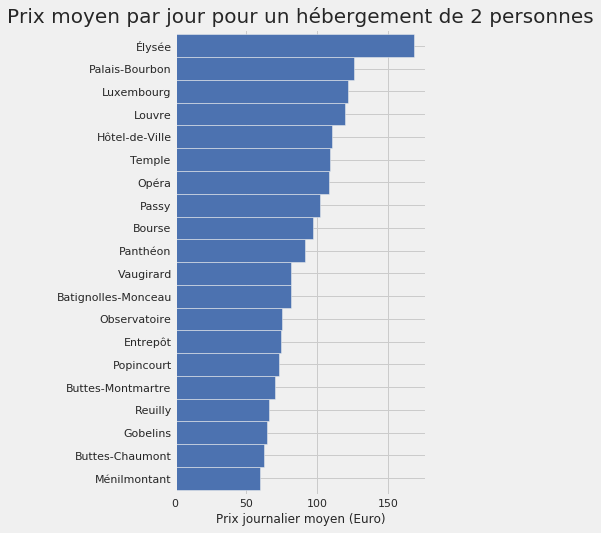

In [15]:

#le type d'hébergement le plus courant, à savoir l'hébergement pour 2 personnes. Comme prévu, l'hébergement dans le centre-ville est le plus cher.

feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(4, 8), color='b', width=1)
plt.title("Prix moyen par jour pour un hébergement de 2 personnes", fontsize=20)
plt.xlabel('Prix journalier moyen (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

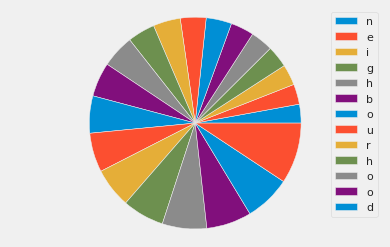

In [54]:
plt.pie(listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True))
plt.axis('equal')
plt.legend('neighbourhood')
plt.show()

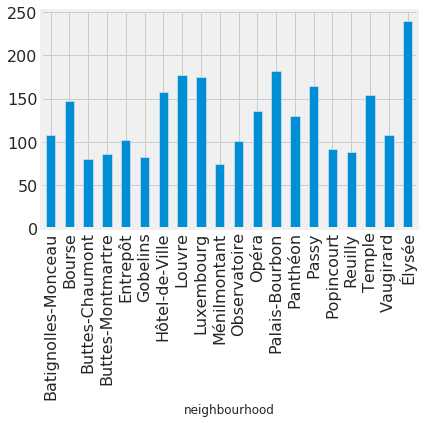

In [0]:
#on trace le graphe
%matplotlib inline
#tracer : quartiers avec moyenne de prix
listings.groupby('neighbourhood').price.mean().plot(kind='bar') 

# ***Types de chambres et types de propriétés : ***

In [0]:
listings.property_type.unique()

array(['Apartment', 'Loft', 'Condominium', 'Bed and breakfast', 'House',
       'Townhouse', 'Guesthouse', 'Boat', 'Guest suite',
       'Serviced apartment', 'Tiny house', 'Villa', 'Other', 'Aparthotel',
       'Houseboat', 'Boutique hotel', 'Treehouse', 'Cottage',
       'Nature lodge', 'Igloo', 'Hostel', 'Cave', 'Hotel', 'Resort',
       'Earth house', 'Casa particular (Cuba)', 'Bungalow', 'Cabin',
       'Campsite', 'Dome house'], dtype=object)

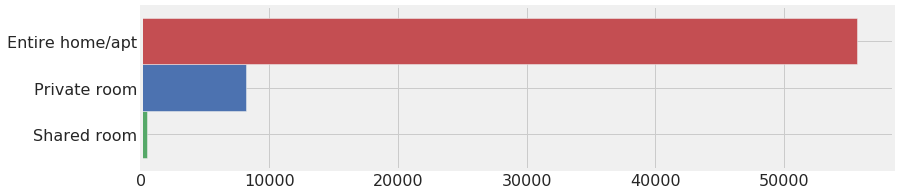

In [0]:
freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 3), width=1, color = ["g","b","r"])
plt.show()

In [0]:
#prix moyen par quartier
adam = gpd.read_file(r"/content/drive/My Drive/data/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[48.8534, 2.3488], zoom_start=11)
folium.GeoJson(data=adam,
               name='Paris',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3


# **affiche les types de propriétés comportant au moins 100 annonces. ici appartements**

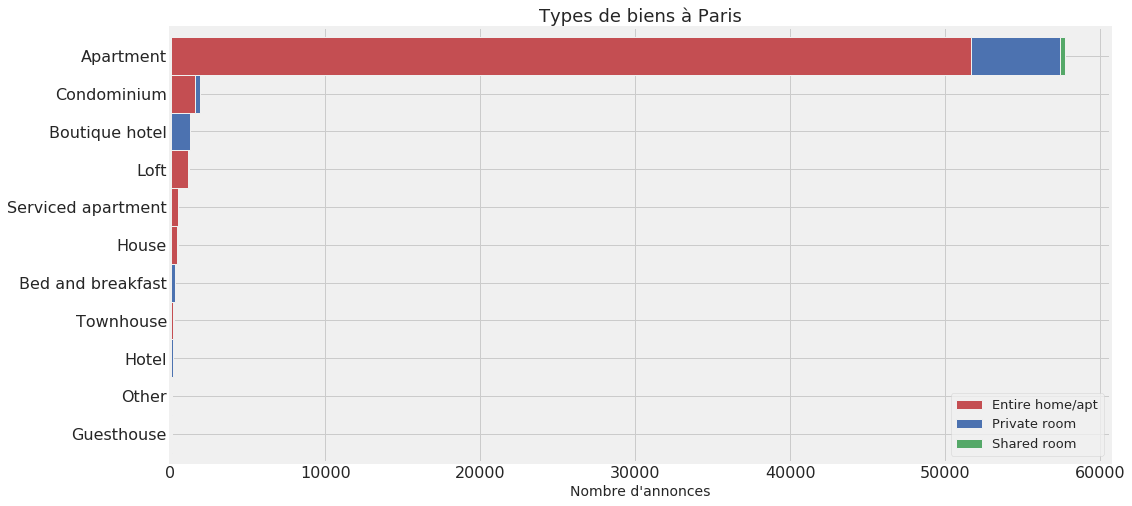

In [0]:


prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Types de biens à Paris', fontsize=18)
plt.xlabel("Nombre d'annonces", fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

# **Capacité d'accueil (nombre de personnes) la plupart des listes sont pour 2 personnes. Airbnb utilise un maximum de 16 invités par annonce.**

# 2- Prix moyens des hébergements par quartiers:

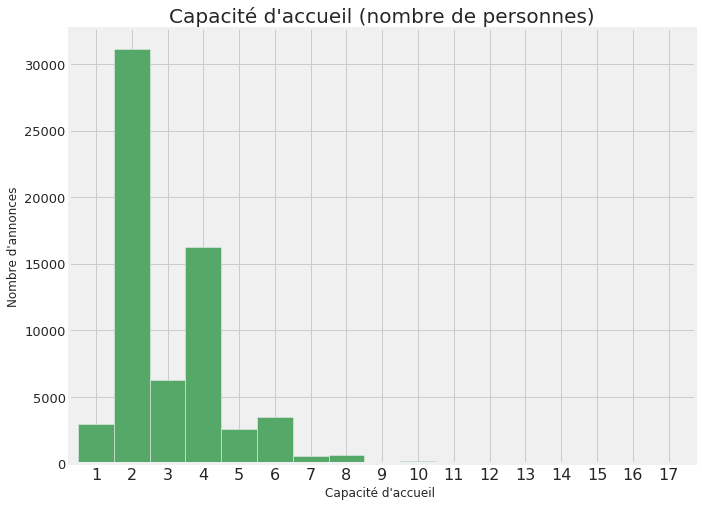

In [0]:
#
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='g', width=1, rot=0)
plt.title("Capacité d'accueil (nombre de personnes)", fontsize=20)
plt.ylabel("Nombre d'annonces", fontsize=12)
plt.xlabel("Capacité d'accueil ", fontsize=12)
plt.show()

# 3- Disponibilité des hébergements intéressants:

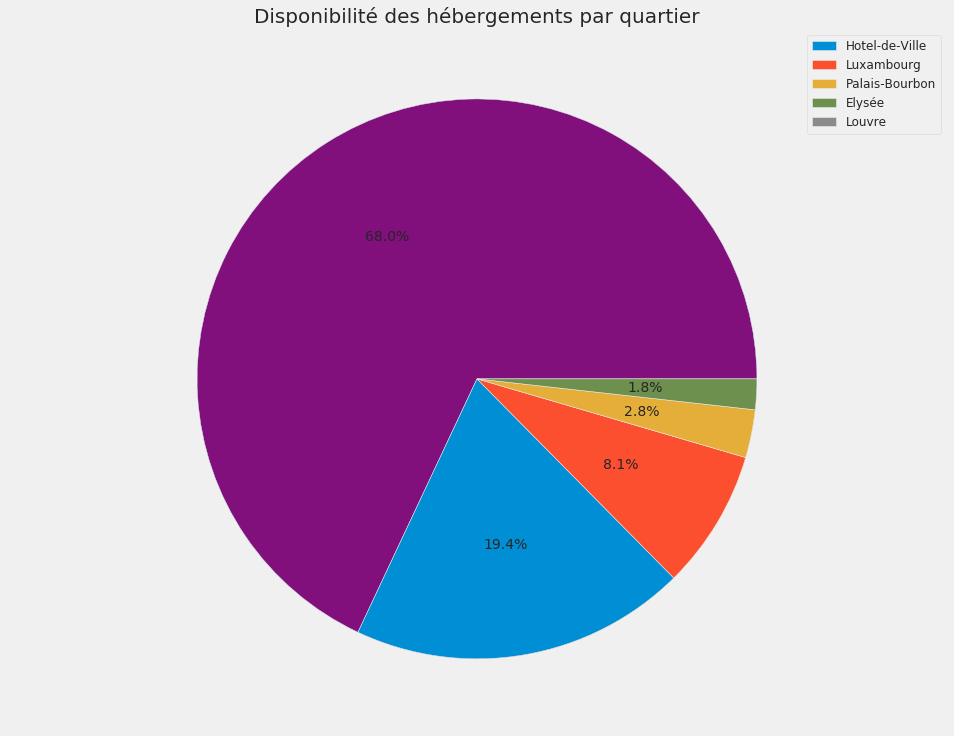

In [68]:
quartiers_choisis = ["Hotel-de-Ville", "Luxambourg", "Palais-Bourbon", "Elysée", "Louvre"]
disponibilité_des_hebergements_pour_la_periode_convenue = [270, 77, 32, 11, 7]

plt.figure(figsize=(15,12))
plt.pie(disponibilité_des_hebergements_pour_la_periode_convenue)
plt.axis('equal')

plt.pie(disponibilité_des_hebergements_pour_la_periode_convenue, autopct='%0.1f%%')
plt.title("Disponibilité des hébergements par quartier", fontsize=20)
plt.legend(quartiers_choisis, fontsize=12)

plt.show()

# 4- Prix moyen des hébergements disponibles dans les quartiers choisis:

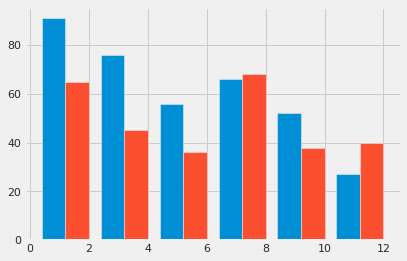

In [62]:
quartiers = ["Hotel-de-Ville", "Luxambourg", "Palais-Bourbon", "Elysée", "Louvre"]
prix_hebergement_15_17Mars =  [91, 76, 56, 66, 52, 27]
prix_moyen_annuel_hebergement = [65, 45, 36, 68, 38, 40]

# Side-By-Side Bars pour comparer les prix des hébergements

n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + w*n for element
             in range(d)]
plt.bar(store1_x,prix_hebergement_15_17Mars )

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element
             in range(d)]
plt.bar(store2_x,prix_moyen_annuel_hebergement)

plt.show()

# **Trouver des hôtels illégaux :  Tout propriétaire qui loue plus de 40% de sa propriété en tant que chambres privées : cas extrêmes.**

In [0]:

private = listings[listings['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name', 'street']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

,host_id,host_name,street,private_rooms
3853,46443228,Xavier,"Paris, Île-de-France, France",32
5200,117297906,Michel Et Ines,"Paris, Île-de-France, France",28
313,2664648,"Sophie, Fred Et Chaimaa","Paris, Île-de-France, France",22
5145,110402903,Isabelle & Thierry,"Paris, Île-de-France, France",19
4625,76104209,Rated,"Paris, Île-de-France, France",17


# **cas extrême : xavier**

In [0]:


xavier = private[private['host_id'] ==46443228]
xavier = xavier[['name','host_id', 'host_name', 'latitude', 'longitude']]
xavier.index.name = "listing_id"
xavier

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
15590,Rooms middle of Saint-Germain des Prés in Paris,46443228,Xavier,48.85447,2.33666
30163,Rooms heart of Saint-Germain des Prés Paris,46443228,Xavier,48.85493,2.33720
32578,Private rooms in Saint-Germain-des-Pres Paris 6,46443228,Xavier,48.85467,2.33727
33306,Room Odeon district near the Seine Latin Quarter,46443228,Xavier,48.85402,2.33650
33962,Hotel rooms heart of Saint-Germain des Prés Odeon,46443228,Xavier,48.85405,2.33584
34284,Historic family hotel rooms Saint-Germain des ...,46443228,Xavier,48.85307,2.33577
34293,"Room with twin single beds, Saint-Germain des ...",46443228,Xavier,48.85439,2.33582
34297,Room 1 queensize bed Saint-Germain des Prés ce...,46443228,Xavier,48.85420,2.33578
34304,Triple beds hotel room in Saint-Germain des Pres,46443228,Xavier,48.85442,2.33736


# **On merge le fichier calendar**

In [0]:
#fichier merger : ici calendar et listings
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,accommodates
9971368,16752200,2020-06-12,f,$125.00,$125.00,7.0,7.0,NaN
21694682,35339360,2020-03-13,f,$50.00,$50.00,2.0,1125.0,NaN
11734432,19712200,2020-03-21,f,$69.00,$69.00,2.0,15.0,NaN
18304084,30724151,2020-05-17,f,$177.00,$177.00,2.0,1125.0,NaN
16057475,26667464,2020-06-19,f,$109.00,$109.00,2.0,14.0,NaN


In [0]:
#nettoyage des $ sur price
listings.price.value_counts().head(20)

80     3197
60     3052
70     3032
50     2955
100    2824
90     2531
65     1922
75     1907
120    1876
55     1725
150    1658
45     1555
40     1525
110    1440
85     1380
95     1248
130     955
35      898
200     819
99      728
Name: price, dtype: int64

In [0]:
#nettoyage des $ sur adjusted_price
#listings.adjusted_price.value_counts()

In [0]:
#$ à supprimer sur la colonne : price

#remplacer des $ pour price
#listings.price.str.replace('$', '')

In [0]:
#$ à supprimer sur la colonne :  adjusted_price

#remplacer des $ pour adjusted_price
#listings.adjusted_price.str.replace('$', '')

# persona : on va d'abord vérifier le contenu

#vérifie le nombre d'annonce par quartier

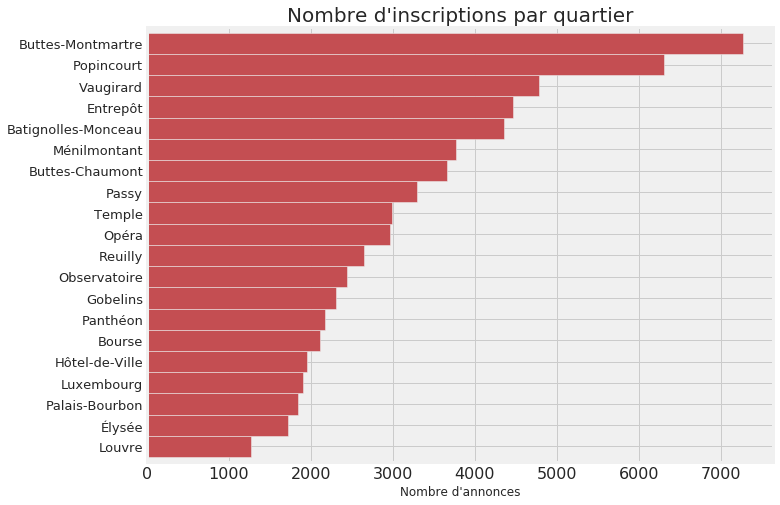

In [0]:

feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='r', width=1)
plt.title("Nombre d'inscriptions par quartier", fontsize=20)
plt.xlabel("Nombre d'annonces", fontsize=12)
plt.show()

#La sécurité du quartier

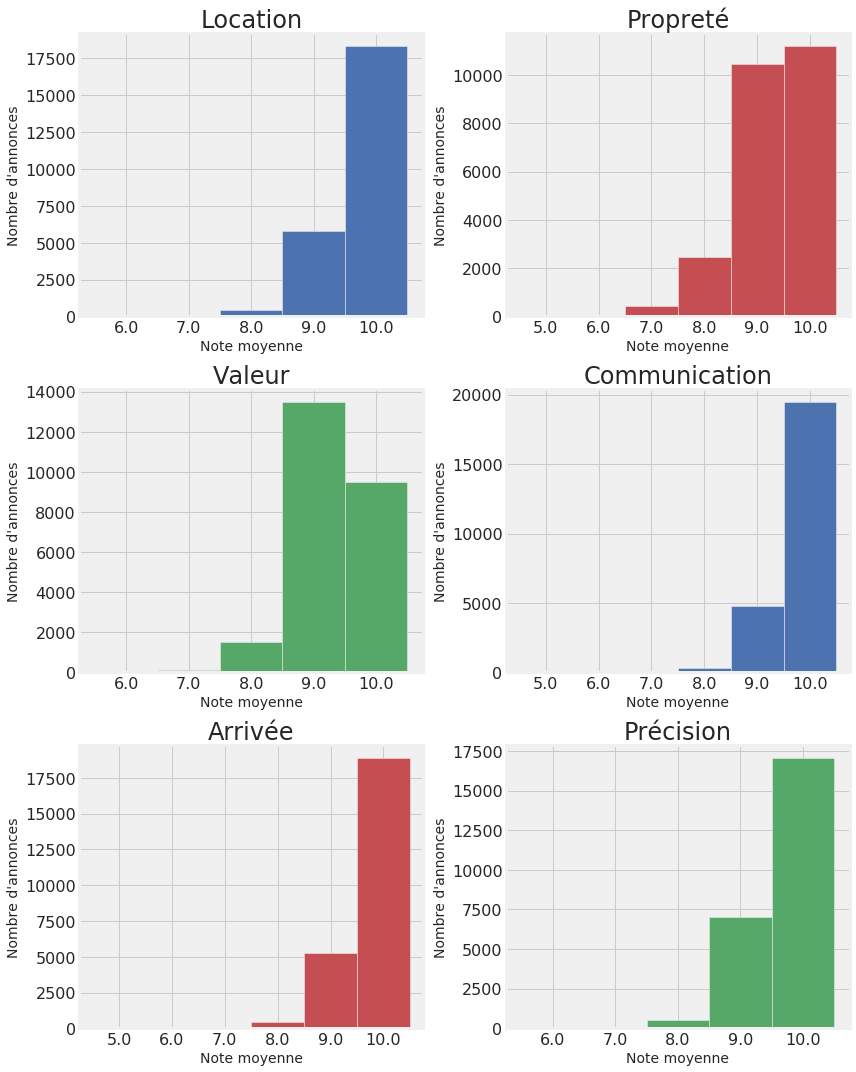

In [0]:


listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(12,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Propreté", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='g', width=1, rot=0)
plt.title("Valeur", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Arrivée", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='g', width=1, rot=0)
plt.title("Précision", fontsize=24)
plt.ylabel("Nombre d'annonces", fontsize=14)
plt.xlabel('Note moyenne', fontsize=14)

plt.tight_layout()
plt.show()

In [0]:
# 3 Dans quel quartier veut-il se loger ?
# Idéalement situé :  
# - quartier hupé ?
    
# - quartier bon marché ?
    
    

#Préciser la recherche : le prix moyen des hébergements pour 2 personnes, marqués comme disponibles à la date voulue et dans les quartiers choisis:

# **Les logements disponibles par quartier**

In [0]:
#listings.head()

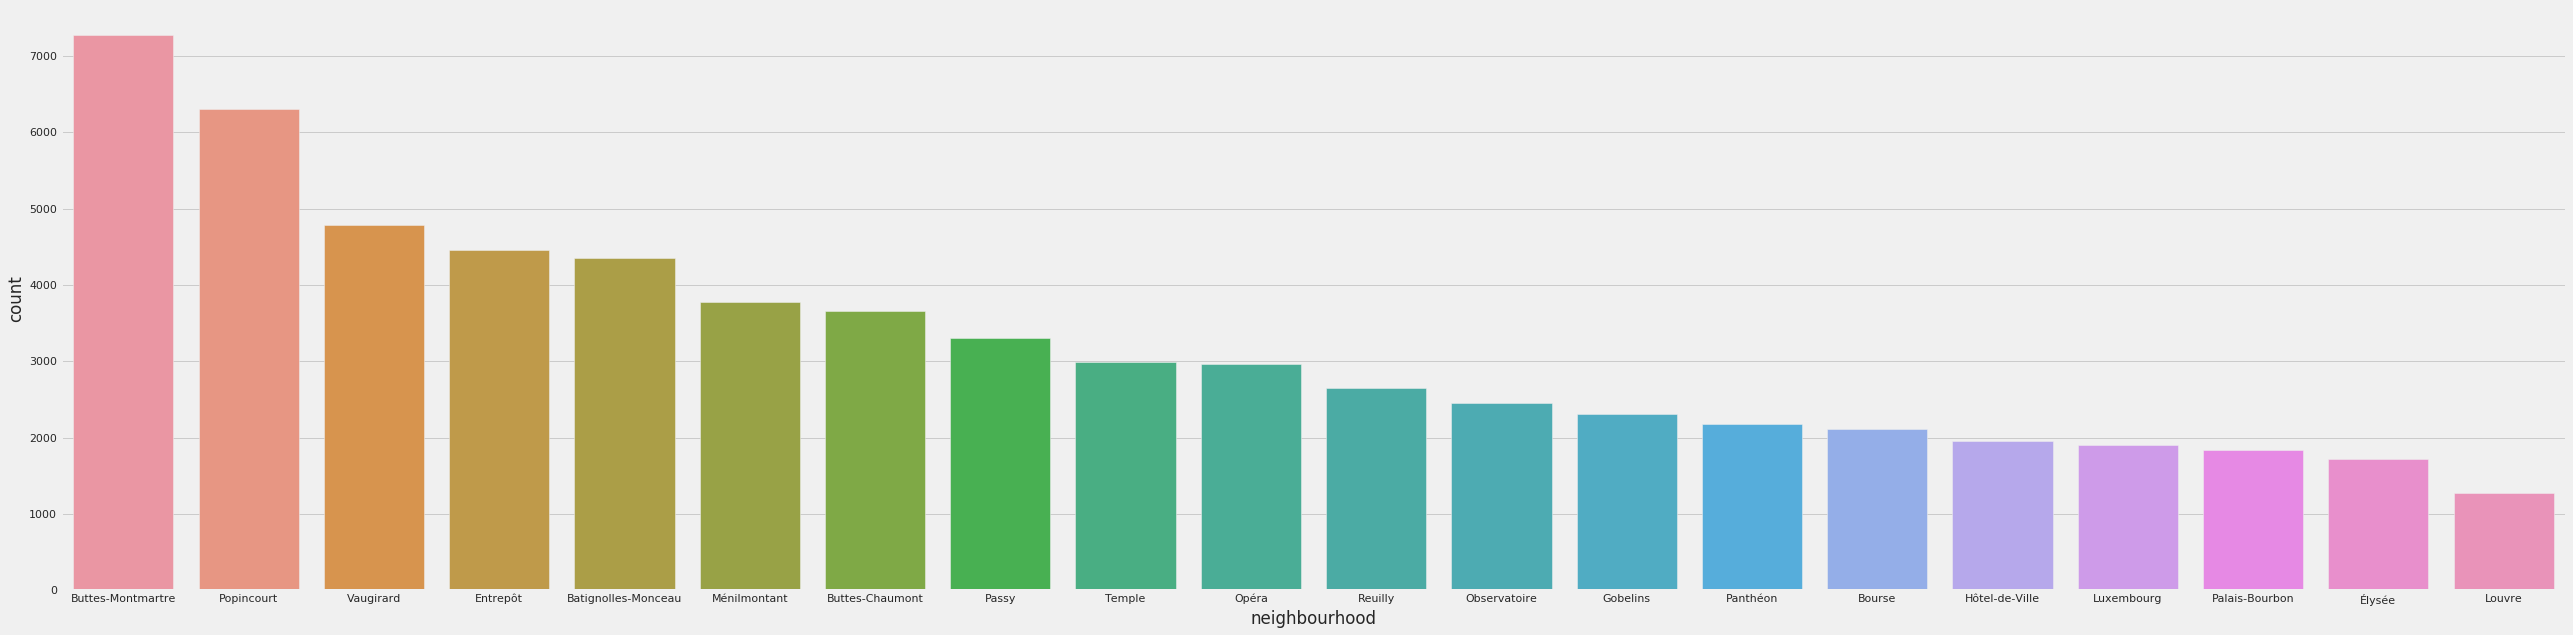

In [22]:
plt.figure(figsize=(40,10))
sns.countplot(x = 'neighbourhood',
              data = listings,
              order = listings['neighbourhood'].value_counts().index)

In [0]:

# listings.minimum_nights.value_counts().sort_index().head(10)

In [0]:
# listings[['price']].boxplot()

6 qu'a t-il pensé de son logement ?

# Selection de l'hebergement en fonction des revuews positives :

# ***on merge des fichiers reviews-details et listings***

In [0]:


reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

,listing_id,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
id,,,,,,,,
123127969,3109,"Tutti Frutti, studio, 2 people",7642792.0,Ludovic,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
123274144,3109,"Tutti Frutti, studio, 2 people",7642792.0,Ludovic,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
207127433,3109,"Tutti Frutti, studio, 2 people",7642792.0,Ludovic,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
208779822,3109,"Tutti Frutti, studio, 2 people",7642792.0,Ludovic,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
234257457,3109,"Tutti Frutti, studio, 2 people",7642792.0,Ludovic,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...


# **les 5 hôtes avec le plus d'avis.**

In [0]:

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

,,number_of_reviews
host_id,host_name,
153624575.0,Haila,539
70316280.0,Georges,535
85347543.0,Vanessa,460
61496679.0,Marlène,356
29643983.0,Audrey,346


In [0]:
reviews_details.comments.head()

id
123127969    The host canceled this reservation the day bef...
123274144    The host canceled this reservation 2 days befo...
207127433              Tout s'est bien déroulé. Merci bien. PG
208779822    Un petit nid fouiller douillet situé dans  app...
234257457    The host canceled this reservation 8 days befo...
Name: comments, dtype: object

In [24]:
#enlever les commentaires vides (530)
# reviews_details = reviews_details[reviews_details['comments'].notnull()]

#enlever les chiffres
# reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 

#tout en minuscule
# reviews_details['comments'] = reviews_details['comments'].str.lower()

#enlever nouvelle ligne
#  reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")

#supprimer les mots vides (de la bibliothèque nltk)

# stop_english = stopwords.words("english")
# reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
#                                                       if i not in (stop_english)]))
# enlever la ponctuation
# reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")

# remplacer x espaces par un espace
# reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] 

"Tout s'est bien déroulé. Merci bien. PG"

# Recouper les informations: trouver les meilleurs reviews concernant les hébergements disponibles dans les quartiers choisis


## 1- Selectionner les commentaires positifs dans les quartiers choisis ("Hotel-de-Ville", "Luxambourg", "Palais-Bourbon", "Elysée", "Louvre"):

## 2- Faire un Histogramme multiple pour comparer les prix des hebergements qui ont reçu les meilleurs commentaires:

In [0]:
# best_freviews=
# prix_hebergement_15_17Mars =
# #histogramme des commentaires positifs dans les quartiers desirés
# plt.hist(best_freviews, bins=20, alpha=0.4,normed=True)
# #histogramme des logements disponibles par prix et par quartiers désirés
# plt.hist(prix_hebergement_15_17Mars, bins=20,alpha=0.4,normed=True)
# plt.show()

In [0]:
#recherche des mots les plus utilisés à l'aide de la fonction CountVectorizer () de sklear
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
0,the,2313769
117,and,1984192
157,to,1236313
8,is,977183
115,was,941909
145,in,878706
121,very,660758
123,we,634624
177,of,580650
131,it,535975


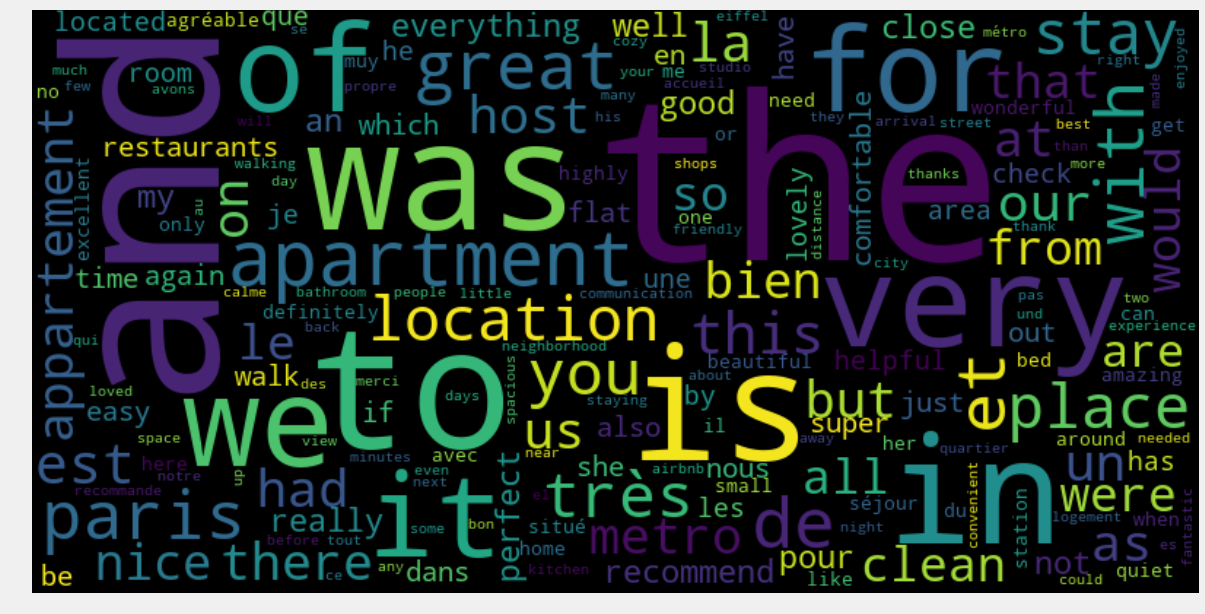

In [0]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3- Choisir un logement offrant le meilleur rapport qualité-prix avec une surface de 50 m² minimum:
### - parmi une liste des meilleurs offres d'appartement choisir ceux >= à 50 m²

## 4- Enfin selectionner les 5 meilleures offres RBNB pour notre couple